<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://d8a-88.github.io/econ-fa19/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 12pt;"><strong>Economic Models</strong>, Fall 2019<br>
            Dr. Eric Van Dusen</p></td></tr>
</table>

# Lab 5: Welfare and Elasticities

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-muted")

## Consumer Surplus

A competitive market is comprised of producers who make goods and services and the consumers who purchase and use them. Through market forces, these consumers and producers agree on a common price for the good or service in question. We will assume that there is no price discrimination and all consumers face the same price. This is typical but not always the case in the real world. Although all consumers face the same market price, consumers are different in how much they individually value a good. We say that consumers have a maximum price that they are willing to pay for a good, and any price marginally higher than this price will dissuade the consumer from participating in the market. This max WTP (willingness to pay) price varies among entities based on their desire for the good, which in turn can be based on how much of the good they already have.

Consider the market for electricity. Among consumers we have entities such as households, commercial buildings, factories, and so on. A factory would likely have a very high WTP for electricity because the opportunity costs for factories to not operate are very high. Capital is expensive, employees still have to be paid, and it is inconvenient to have to stop and start up machinery frequently. Thus, for a factory it is preferable to always have a reliable supply of electricity to continue operations and this need is reflected in the WTP. Contrast this with households, who certainly value having electricity, but should electricity become prohibitively expensive, probably would decide to cut back on usage as the drawbacks of not having electricity aren't as severe compared to the factory above.

## Producer Surplus

Producers experience a similar characteristic. A producer has a minimum price at which it is willing to produce a good based on its costs. Any market price less than this price would dissuade a producer from supplying its good. Again, in the electricity example, we have several power plants that produce electricity, but each inherently does so at different costs. Imagine and contrast the operating costs of a solar farm with a coal plant, or a newer, more efficient natural gas plant versus an older one.

Putting all of these concepts together we arrive at the idea of economic welfare. Suppose electricity costs 10 cents per kWh. On the demand side, imagine a factory who's WTP is 30 cents/kWh. This factory enjoys a consumer surplus of 20 cents/kWh, in other words, it's paying 20 cents less per kWh than what it would be willing to pay. A household might have a WTP of 15 cents/kWh. Here the household's surplus is only 5 cents/kWh. We can also imagine a consumer whose WTP is less than the market price and thus doesn't participate in the market. Imagine for some reason that cryptocurrency prices have dropped to the point that they aren't worth the electricity it takes to mine them. In this case, we might have an idle or non-existent crypto-farm (a place with a lot of computing power) due to electricity being too expensive. On the producer side, maybe we have a solar plant which is operating at the market price, but a natural gas plant that is idling because the price of supplying electricity isn't sufficient to make up for operating costs.

Combining the surpluses of all individual consumers and producers yields the market consumer surplus and producer surplus. As the market price fluctuates, certain comsumers and producers enter and exit the market, and the total surplus varies. Note from the above examples that a consumer is not always an individual, it can be a firm buying from another firm. We now explore further.

## Example

We create a consumer class with a WTP characteristic, and a list of consumers with WTP from 10 to 1. The binary function `demand` indicates whether the consumer participates in the market at a given price or not.

In [2]:
class Consumer:
    def __init__(self, WTP):
        self.WTP = WTP
    def demand(self, price):
        if price <= self.WTP:
            return 1
        else:
            return 0
    def surplus(self, price):
        if price <= self.WTP:
            return self.WTP - price
        else:
            return 0
        
consumers = [Consumer(x) for x in range(10,0,-1)]

print([x.demand(6) for x in consumers])

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


For a market price of 6, we have 5 consumers who participate and 5 who don't. Now let's make a matrix of the lists of participants for each market price between 1 and 10.

In [3]:
for price in range(10,0,-1):
    print([x.demand(price) for x in consumers])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Notice the vague resemblance to a downward-sloping demand curve. The left-most consumer, with a WTP of 10, always participates for these prices. The right-most consumer only participates at a market price of 1. Now lets try and find participation for each price point, starting at 10.

In [4]:
print("Market Price:", "Market Participants")
print("")
for price in range(10,0,-1):
    if price == 10:
        print(str(price) + ":", sum([x.demand(price) for x in consumers]))
    else:
        print(str(price) + ": ", sum([x.demand(price) for x in consumers]))

Market Price: Market Participants

10: 1
9:  2
8:  3
7:  4
6:  5
5:  6
4:  7
3:  8
2:  9
1:  10


Here, each number represents the total number of market participants as the market price *decreases* starting from 10. Notice as the price decreases, participation increases in this demand case. Now lets find actual surplus.

In [5]:
for price in range(10,0,-1):
    print([x.surplus(price) for x in consumers])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]
[5, 4, 3, 2, 1, 0, 0, 0, 0, 0]
[6, 5, 4, 3, 2, 1, 0, 0, 0, 0]
[7, 6, 5, 4, 3, 2, 1, 0, 0, 0]
[8, 7, 6, 5, 4, 3, 2, 1, 0, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


Instead of printing a binary 1 or 0 indicating market participation, we've displayed each participant's actual surplus value. Similarly, let's find total surplus per price point.

In [6]:
print("Market Price:", "Consumer Surplus")
print("")
for price in range(10,0,-1):
    if price == 10:
        print(str(price) + ":", sum([x.surplus(price) for x in consumers]))
    else:
        print(str(price) + ": ", sum([x.surplus(price) for x in consumers]))

Market Price: Consumer Surplus

10: 0
9:  1
8:  3
7:  6
6:  10
5:  15
4:  21
3:  28
2:  36
1:  45


Clearly there must be an opposite "force" at play here, otherwise all prices would converge to 0 as consumers maximize their surplus (more on maximization later). Naturally, we must also consider the producers who sell their product to the consumers. We essentially repeat the exercise above, but now instead of a consumer class with individual willingness to pay, we have a producer class with some minimal market price at which production can occur.

In [7]:
class Producer:
    def __init__(self, WTA):
        self.WTA = WTA
    def supply(self, price):
        if price >= self.WTA:
            return 1
        else:
            return 0
    def surplus(self, price):
        if price >= self.WTA:
            return price - self.WTA
        else:
            return 0
        
producers = [Producer(x) for x in range(1,11)]

for price in range(10,0,-1):
    print([x.surplus(price) for x in producers])

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[8, 7, 6, 5, 4, 3, 2, 1, 0, 0]
[7, 6, 5, 4, 3, 2, 1, 0, 0, 0]
[6, 5, 4, 3, 2, 1, 0, 0, 0, 0]
[5, 4, 3, 2, 1, 0, 0, 0, 0, 0]
[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]
[3, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Looks familiar, but with an opposite slope! Here we've captured the idea of producer surplus. At a market price of 10, the leftmost producer is very happy with a surplus of 9, as in this case that producer is actually able to produce and sell at a price of 1 but is able to operate at a price of 10.

## Some Thoughts

Before we continue, let's take a moment to think about the meaning and significance of our findings. Firms that can produce at lower market prices than their peers seem to be better off in the sense that they enjoy higher surplus. This minimum production price is based on the costs of operation the firm experiences, so naturally it seems that firms that can operate at lower costs do better. Certainly, if market prices decrease, more inefficent firms would be the first to shut down while these low operating cost firms continue to do business. This idea is very important in economics: Firms that can reduce their costs are rewarded with higher surplus. This is pretty much how society advances, at least in an economics context. Production methods continually to improve, and less efficient firms must either follow suit or shut down as prices decrease, to the benefit of consumers.

However, what would the equivalent be for the consumer side of things? We've discussed the idea of willingness to pay, and initially it might seem that in our perfectly-competitive market environment, only the consumers who most need a good or service will be the first to get it, as their WTP is the highest. We might think that resources are efficiently allocated in this way. Most of the time this is likely the case, but we've made an assumption while reaching this conclusion; an assumption that doesn't necessarily hold. We have assumed that a person with high willingness to pay also has at least an equally high *ability* to pay. In reality, this might not be the case. A hungry person might have high WTP for a serving of food, but if this person lacks the means to pay for this food, his willingness to pay won't do him much good. In this scenario, our earlier exercise reflects willingness to pay with a simultaneous ability to pay as well. While this week isn't about the ethics of certain types of markets and whether they achieve their goals, it's important to keep in mind that in these ideal exercises, an efficient economy with rational pricing should reflect consumers' willingness to pay, whereas in reality this might not actually be the case.

## Note on the Demand and Supply Curves

As pointed out above, the matrix we saw with rows of surpluses and columns of prices resembles the demand curve in the sense that we can see a diagonal line separating participants from non-participants. This is no coincidence. This idea is essentially what the demand and supply curves depict, except that due to there usually being many participants in a market, we simplify the concept to a continuous curve as opposed to a set of discrete values. This is helpful not only for visualization, but as we will soon see we can use these curves to find rates of change, which will prove to be useful as well.

Earlier we had a matrix of each individual's surplus at each price point, and the overall surplus at each price point. Notice how as the price decreased, surplus increased. Let's see this exact same concept illustrated on a familiar demand curve. Take a few moments to adjust the slider controlling the market price to see how consumer surplus behaves.

In [8]:
def demand(price):
    p = sympy.Symbol("p")
    consumers = [Consumer(x) for x in range(0,11)]
    demand_equation = 10 - p
    prices = [x for x in range(0,11)]
    demand_Q = [demand_equation.subs(p,x) for x in prices]
    
    plt.figure(figsize = [9,6])
    plt.plot(prices, demand_Q)
    plt.plot(demand_equation.subs(p,price), price, 'ro')
    
    triangle1 = patches.Polygon([[demand_equation.subs(p,price),price], [0,price], [0,10]], True, color='g')
    current_axis = plt.gca()
    current_axis.add_patch(triangle1)
    
    plt.xlabel("Demand Quantity")
    plt.ylabel("Price")
    plt.title("Demand Curve with Consumer Surplus Shaded")
    plt.show()
    print("Consumer surplus is equal to: "+str(sum([person.surplus(price) for person in consumers])))

slider1 = widgets.IntSlider(min=1, max=10, step=1, value=5)
display(widgets.interactive(demand, price=slider1))

interactive(children=(IntSlider(value=5, description='price', max=10, min=1), Output()), _dom_classes=('widget…

Producer surplus with the supply curve works exactly the same way but mirrored to reflect the fact that producers gain surplus from higher prices instead of lower.

In [9]:
def supply(price):
    p = sympy.Symbol("p")
    producers = [Producer(x) for x in range(1,11)]
    supply_equation = p
    prices = [x for x in range(0,11)]
    supply_Q = [supply_equation.subs(p,x) for x in prices]
    
    plt.figure(figsize = [9,6])
    plt.plot(prices, supply_Q, 'r')
    plt.plot(supply_equation.subs(p,price), price, 'ro')
    
    triangle1 = patches.Polygon([[supply_equation.subs(p,price),price], [0,price], [0,0]], True, color='g')
    current_axis = plt.gca()
    current_axis.add_patch(triangle1)
    
    plt.xlabel("Supply Quantity")
    plt.ylabel("Price")
    plt.title("Supply Curve with Producer Surplus Shaded")
    plt.show()
    print("Producer surplus is equal to: "+str(sum([person.surplus(price) for person in producers])))

slider1 = widgets.IntSlider(min=1, max=10, step=1, value=5)
display(widgets.interactive(supply, price=slider1))

interactive(children=(IntSlider(value=5, description='price', max=10, min=1), Output()), _dom_classes=('widget…

Here we used a demand curve of $10-P$ and a supply curve of $P$. Now explore how the surplus changes with shifts in the curves below. `demandParam` adjusts the intercept of the demand curve, `supplyParam` adjusts the slope of the supply curve.

In [10]:
def equilibrium(demandParam, supplyParam):
    p = sympy.Symbol("p")
    demand_equation = demandParam - p
    supply_equation = p * (supplyParam / 10)
    price_end = sympy.solve(demand_equation)[0]
    prices = []
    demand_Q = []
    supply_Q = []
    for price in range(0, price_end + 1):
        prices += [price]
        demand_Q += [demand_equation.subs(p,price)]
        supply_Q += [supply_equation.subs(p,price)]
    
    equilibrium_P = sympy.solve(demand_equation-supply_equation)[0]
    equilibrium_Q = demand_equation.subs(p,equilibrium_P)
    
    plt.figure(figsize = [9,6])
    plt.plot(demand_Q,prices, label="Demand")
    plt.plot(supply_Q,prices, 'r', label="Supply")
    plt.legend()
    plt.plot(equilibrium_Q,equilibrium_P, 'ro')
    
    triangle1 = patches.Polygon([[equilibrium_Q,equilibrium_P], [0,equilibrium_P], [0,price_end]], True, color="green")
    triangle2 = patches.Polygon([[equilibrium_Q,equilibrium_P], [0,equilibrium_P], [0,0]], True, color="lightgreen")
    current_axis = plt.gca()
    current_axis.add_patch(triangle1)
    current_axis.add_patch(triangle2)
    
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.title("Supply and Demand Curves with Surplus Shaded")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("The equilibrium price is "+str(round(equilibrium_P,2))+" and equilibrium quantity is "+str(round(equilibrium_Q,2))+".")
    print("The consumer surplus at this equilibrium "+str((price_end-equilibrium_P)*(equilibrium_Q)*.5))
    print("The producer surplus at this equilibrium "+str((equilibrium_P)*(equilibrium_Q)*.5))

slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=5, max=15,step=1,value=10)
display(widgets.interactive(equilibrium, demandParam=slider1, supplyParam=slider2))

interactive(children=(IntSlider(value=10, description='demandParam', max=15, min=5), IntSlider(value=10, descr…

## Elasticity

Suppose you own a business but you find yourself struggling to make a profit lately. How would you resolve this? You might consider raising your prices. But surely if you were to raise your prices too much you might lose some of your customers. To relate to our discussions above regarding surplus, maybe some of your customers are already at their highest willingness to pay, and raising prices would push them away from your business. Depending on the situation, you might lose so many customers that the increased revenue from raising your prices are completely offset by a decline in customers. This is a problem. To answer the question of how much to raise prices without losing too many customers and therefore losing revenue, we would like a way to measure this concept of customers' responsiveness to prices. We call this concept *elasticity*.

How would we measure elasticity? In the above context, we want to see how much quantity demanded of your business's goods or services changes in response to a change in price. It seems like a good place to start would be to define elasticity as the percent change in quantity over percent change in price. Let's use the demand curve depicted below as an example.

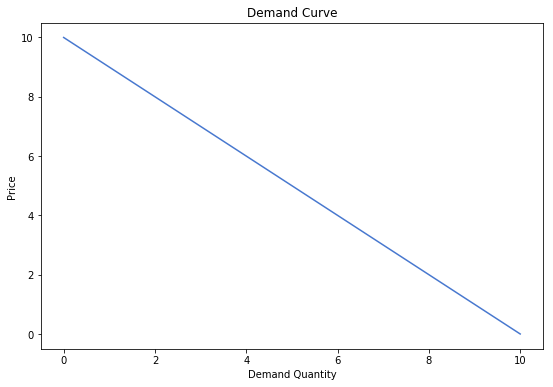

In [11]:
def plot_demand1():
    p = sympy.Symbol("p")
    demand_equation = 10 - p
    prices = [x for x in range(0,11)]
    demand_Q = [demand_equation.subs(p,x) for x in prices]
    plt.figure(figsize = [9,6])
    plt.plot(prices,demand_Q)
    plt.xlabel("Demand Quantity")
    plt.ylabel("Price")
    plt.title("Demand Curve")

plot_demand1()
plt.show()

Now let's say our current price is 5, and we would like to increase the price to 6. We can see from the curve that this causes demand to drop from 5 to 4.

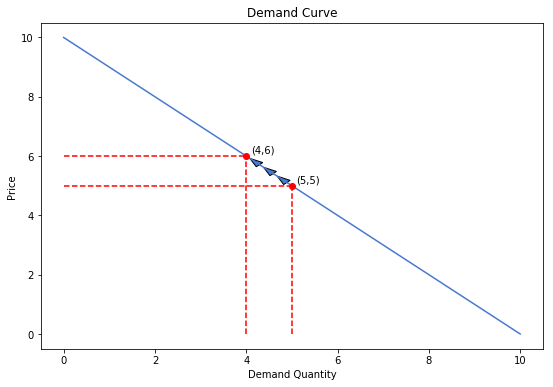

In [12]:
plot_demand1()
plt.plot(np.full(6,5), np.arange(0,6,1), 'r--')
plt.plot(np.full(7,4), np.arange(0,7,1), 'r--')
plt.plot(np.arange(0,6,1), np.full(6,5), 'r--')
plt.plot(np.arange(0,5,1), np.full(5,6), 'r--')
plt.plot(5,5,'ro')
plt.text(5.1,5.1,"(5,5)")
plt.plot(4,6,'ro')
plt.text(4.1,6.1,"(4,6)")
plt.arrow(4.9,5.1,-0.01,0.01,head_width=0.2)
plt.arrow(4.6,5.4,-0.01,0.01,head_width=0.2)
plt.arrow(4.3,5.7,-0.01,0.01,head_width=0.2)
plt.show()

Using our definition from above, we can calculate the elasticity.

$$
\begin{align}
\frac{\%\Delta Q}{\%\Delta P} &= \frac{\frac{4-5}{5}\times100\%}{\frac{6-5}{5}\times100\%} \\
&= \frac{-20\%}{20\%} \\
&= 1
\end{align}
$$

*Note that we take the absolute value for elasticity.*

This tells us that in this specific example, the percent change in price is met with an equal percent change in quantity. But what happens if we start at a price of 6 and go down to a price of 5? This movement is just the opposite of what we did above, so is the elasticity also 1? Let's see.

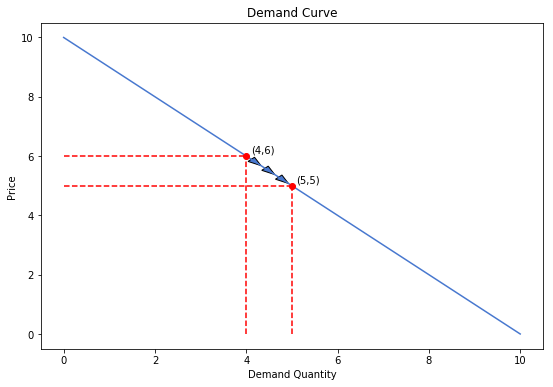

In [13]:
plot_demand1()
plt.plot(np.full(6,5), np.arange(0,6,1), 'r--')
plt.plot(np.full(7,4), np.arange(0,7,1), 'r--')
plt.plot(np.arange(0,6,1), np.full(6,5), 'r--')
plt.plot(np.arange(0,5,1), np.full(5,6), 'r--')
plt.plot(5,5,'ro')
plt.text(5.1,5.1,"(5,5)")
plt.plot(4,6,'ro')
plt.text(4.1,6.1,"(4,6)")
plt.arrow(4.7,5.3,0.01,-0.01,head_width=0.2)
plt.arrow(4.4,5.6,0.01,-0.01,head_width=0.2)
plt.arrow(4.1,5.9,0.01,-0.01,head_width=0.2)
plt.show()

$$
\begin{align}
\frac{\%\Delta Q}{\%\Delta P} &= \frac{\frac{5-4}{4}\times100\%}{\frac{5-6}{6}\times100\%} \\
&= \frac{25\%}{-16.67\%} \\
&\approx 1.5
\end{align}
$$

We get a different number! This is of course a property of percentages. In both scenarios we moved price by 1, but we started at different prices, and increasing price by 1 starting from 5 is different percentage-wise from starting at 6 and decreasing by 1.

If we want to find a unique value for elasticity between the price points of 5 and 6, independent of price movement, we can use something called the **mid-point method**. It looks like this:

$$\frac{\frac{Q_2 - Q_1}{(Q_2 + Q_1)\times0.5}\times100\%}{\frac{P_2 - P_1}{(P_2 + P_1)\times0.5}\times100\%}$$

What this does is it essentially finds the elasticity of the point between the two given points.

It is also useful, however, to think of elasticity as a property of a single point. For example, we might want the price point of 5 in the example above to have an elasticity of 1 irrespective of what other point we are going to or coming from. For this, we can use the **point-slope formula**.

$$\frac{\Delta Q}{\Delta P}\frac{P}{Q}$$

or

$$\frac{dQ}{dP}\Bigr|_{P,Q}\times\frac{P}{Q}$$

where the left fraction is the inverse slope at that particular point.

It turns out that in our example above, we can think of the very first formula for elasticity (percent change in quantity over percent change in price) as the point-slope elasticity of the starting point. To verify this, find the elasticity from a price of 5 to 6, from a price of 5 to 4, and at the price of 5 using the point-slope formula. You should get the same answer all three times. This does not hold in general for all curves, but using the base formula that was first introduced should be fine for our examples and other situations.

## Other Elasticities

We can measure elasticity in different contexts as well. Naturally, if we have an elasticity of demand, it follows that we should have an elasticity of supply. Just like consumers make adjustments to their quantity demanded based on changes in the market price, producers respond to market prices as well. Elasticity of supply can be calculated similarly to elasticity of demand.

Imagine that there are two fast food locations next to each other on campus competing for students' business. Let's call them Railway and Bear Express. Initially, their food is priced such that they get equal amounts of business from the students, and students on average don't prefer one over the other; they just want a good and affordable place to eat. Now, imagine that Bear Express raises the prices of their food, while Railway holds their prices steady. In this scenario, one can imagine that students would begin eating more frequently at Railway as opposed to Bear Express due to it being relatively cheaper out of the two options. Now, if Railway in turn increases their prices, the flow of students would shift back to Bear Express by a certain amount. These two restaurants are said to offer goods that are *substitutes* to each other. That is, a consumer will want one or the other, but usually not both. Furthermore, it would seem that just like the price of a good affects its quantity demanded, for substitutes the price of one good can affect the quantity demanded of the other. This is called *cross-price elasticity of demand* (as opposed to *own-price elasticity* that we just learned earlier). It can be defined as follows:

$$\frac{\%\Delta Q_{Good A}}{\%\Delta P_{Good B}}$$

Notice that here there is a notion of positive and negative elasticity. Substitutes will have positive cross-price elasticity, because we expect that an increase in the price of one good will lead to an increase in the quantity demanded of its substitute. But what about when cross-price elasticity is negative? In other words, are there goods where an increase in the price of one leads to a decrease in the quantity demanded of the other? Of course; these are called *complements*. Examples of complementary goods could be cars and gasoline, hot dogs and hot dog buns, or peanut butter and jelly.

There is one more type of elasticity that we will briefly discuss, and that is *income elasticity of demand*. For most goods, the more disposable income consumers have the more they will demand these goods. Almost all goods follow this pattern, and thus there are countless examples. These goods are called *normal goods*. More interestingly, there are some goods, called *inferior goods*, for which we see quantity demanded decrease as income increases. An example of this might be frozen, microwaveable food. As consumers grow wealthier and their palates grow more discerning, their consumption of frozen food might decrease in place of more cooked meals. To calculate this elasticity we would use the following:

$$\frac{\%\Delta Q}{\%\Delta Income}$$

## Elasticity and Revenue

Let's take a closer look at own-price elasticity of demand. Below we've defined a function using our first definition. Let's see what happens as we increase price.

In [14]:
def elasticity(P1,P2,Q1,Q2):
    return ((Q2-Q1)/Q1)/((P2-P1)/P1)

p = sympy.Symbol("p")
demand_equation = 10-p
prices = [i for i in range(1,10)]

print("Price: Elasticity")
print()

for x in prices:
    print(str(x)+":", abs(elasticity(x,x+1,demand_equation.subs(p,x),demand_equation.subs(p,x+1))))

Price: Elasticity

1: 0.111111111111111
2: 0.250000000000000
3: 0.428571428571429
4: 0.666666666666667
5: 1.00000000000000
6: 1.50000000000000
7: 2.33333333333333
8: 4.00000000000000
9: 9.00000000000000


Notice the way elasticity increases with an increase in price, on this particular demand curve. When elasticity is less than 1, we call it *inelastic*. In other words, a change in price doesn't change the quantity demanded as drastically. If elasticity is greater than 1, we say it is *elastic*. A change in price causes a great change in quantity demanded of a good. An elasticity of 1 is called *unitary elastic*, or *unit elastic*. Returning to our original question of how elasticity relates to decisions a firm might have to make regarding prices, let's look at how changing elasticty affects revenue for a firm increasing its prices.

In [15]:
def elasticity_revenue(price):
    p = sympy.Symbol("p")
    demand_Q = [demand_equation.subs(p,x) for x in range(1,10)]
    prices = [x for x in range(1,10)]

    def draw_revenue(P,Q):
        rect = patches.Rectangle((0,0),Q,P,linewidth=1,facecolor="green")
        currentAxis = plt.gca()
        currentAxis.add_patch(rect)
        print("The revenue of the graph below is "+str(P*Q))

    quantity = demand_equation.subs(p,price)
    elast = abs(elasticity(price,price+1,demand_equation.subs(p,price),demand_equation.subs(p,price+1)))
    plt.figure(figsize = [9,6])
    plt.plot(demand_Q,prices)
    plt.xlabel("Demand Quantity")
    plt.ylabel("Price")
    plt.title("Demand Curve with Revenues Shaded")
    draw_revenue(price,quantity)
    print("The elasticity at this point is "+str(elast))
    plt.show()
slider1 = widgets.IntSlider(min=1, max=9,step=1,value=5)
display(widgets.interactive(elasticity_revenue, price=slider1))

interactive(children=(IntSlider(value=5, description='price', max=9, min=1), Output()), _dom_classes=('widget-…

Notice how a price increase will increases revenue until a certain point, at which point revenue decreases again. Intuitively this makes sense. A firm can only increase its prices so much until it starts losing too many of its customers for the increase to be worthwhile. Let's try and find when this happens in general. First let's plot revenue as a function of price.

In [ ]:
elast = [abs(elasticity(x,x+1,demand_equation.subs(p,x),demand_equation.subs(p,x+1))) for x in range(1,10)]
revenue = [demand_equation.subs(p,x)*x for x in range(1,10)]
prices = [x for x in range(1,10)]
plt.figure(figsize = [9,6])
plt.plot(prices,revenue)
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title("Revenue vs Price for Given Demand Curve")
plt.show()

We notice that revenue reaches a maximun at a price of 5. What elasticity does this price point have?

In [ ]:
plt.figure(figsize = [9,6])
plt.plot(prices,elast)
plt.plot(np.arange(1,6,1), np.full(5,1), 'r--')
plt.plot(np.full(2,5), np.arange(0,2,1), 'r--')
plt.plot(5,1,'ro')
plt.text(5,1.5,"(5,1)")
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Elasticity vs Price for Given Demand Curve")
plt.show()

Revenue is maximized when elasticity is 1! To further reinforce this, let's plot revenue vs elasticity.

In [ ]:
plt.figure(figsize = [9,6])
plt.plot(elast,revenue)
plt.plot(np.full(17,1), np.arange(9,26,1), 'r--')
plt.plot(1,25,'ro')
plt.text(1.3,25,"(1,25)")
plt.xlabel("Elasticity")
plt.ylabel("Revenue")
plt.title("Revenue vs Elasticity for Given Demand Curve")
plt.show()

Before we continue to the final section let's make sure we have a solid intuitive grasp of the significance of our findings. Near low price points, a firm deciding how to raise prices will tend to face inelastic demand. You can imagine that if there were some market where let's say laptops cost only a few dollars, doubling the price of laptops would proabalby not decrease demand for laptops at all, since the price of laptops is still very low. Here, demand is inelastic, or in other words, it is less than 1, because a unit change in price is not met by the same change in quantity. Alternatively, if laptops were to cost as much as a house, and then the price for laptops doubled, the few people who were still in the market for laptops would probably be very discouraged from continuing to buy laptops. It wouldn't be unreasonable to assume that nearly all of the demand would be lost. Here, demand is elastic, or greater than 1, because a unit change in price is met by an even greater change in quantity. The point of the above exercise is to illustrate that there is some middle ground between these two extremes, where a firm with a good pulse on market demand should be pricing its products.

It's important to remember that while we have so far been discussing elasticity from a demand perspective, supply also has the property of elasticity.

## Relative Elasticity

Suppose that you are hiking in the mountains when a venomous snake bites you. Fortunately there is a hospital nearby. Unfortunately, it seems that their antivenom is very expensive. If the antivenom costs \\$1000, would you pay? What if the price doubled to \\$2000? What is your max willingness to pay for this antivenom? In the moment, you would likely be willing to pay anything and everything for the antivenom, as any money you refuse to pay won't be of much use to you if you're dead.

Contrast this with your demand for pizza. Imagine a pizza chain close to where you live doubles their prices from \\$3 a slice to \\$6 a slice. Most people would be disuaded from buying pizza by this price increase, assuming that there are many alternatives to pizza close to where you live. Since pizza is not a very essential good, and there are plenty of other places to eat close to where you live, most wouldn't see the point in getting pizza anymore.

We can easily see that any change in price is unlikely to change the demand for antivenom in our example, and thus we say the demand for antivenom is inelastic. But this is a different kind of elasticity. We are not measuring the marginal change in quantity demanded at a given price point or interval, we are saying that in general, on the demand curve for antivenom the elasticity at any price is more inelastic than some other typical demand curve. Similarly, in our example we can say that the demand for pizza is relatively elastic, as the pizza chain cannot change their prices too much without significantly altering the quantity demanded for their pizza. The keyword in this concept is *relative*. It doesn't really make much sense to say that the demand for antivenom is inelastic without there being at least one other kind of demand that is comparatively elastic.

More specifically, our example of antivenom likely exhibits *perfect inelasticity*, meaning that demand for antivenom is the same at absolutely any price; the hospital can charge any price it wants for antivenom. Contrast this with our nearby pizza chain. If we make some further assumptions and say that the market for food around your house or apartment is perfectly competitive, such that any marginal increase in price of one food chain will cause them to lose all of their customers to other food chains, then the demand for the specific food of that chain is *perfectly elastic*. The chain cannot increase its prices or else it will lose all demand. These two extreme scenarios are depicted below.

In [ ]:
plt.figure(figsize = [9,6])
plt.plot(np.full(20,1), np.arange(0,20,1))
plt.xlabel("Quantity Demanded")
plt.ylabel("Price")
plt.title("Perfectly Inelastic Demand Curve")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [ ]:
plt.figure(figsize = [9,6])
plt.plot(np.arange(0,20,1), np.full(20,1))
plt.xlabel("Quantity Demanded")
plt.ylabel("Price")
plt.title("Perfectly Elastic Demand Curve")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

## Conclusion

This week we discussed consumer and producer surplus, and interpreted this as a sort of additional benefit that consumers experience when the market price is less than what they would be willing to pay, and producers experience when the market price is greater than what they would be able to operate at. We drew intuition behind the shape of demand and supply curves, and superimposed surplus onto these curves. We then transitioned to elasticity and discussed the different kinds of elasticity, different ways of measuring elasticity, and how firms might use the concept of elasticity to price their goods.